<a href="https://colab.research.google.com/github/steviapriliaa87/steviapriliaa87-Project-Analisis-Data-Bike-Sharing/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Stevi Aprilianti Cahyani
- **Email:** steviaprilia7@gmail.com
- **ID Dicoding:** apriliaastevi

## **Menentukan Pertanyaan Bisnis**

- Pertanyaan 1: Kapan waktu (jam) dengan jumlah penyewaan sepeda terbanyak?
- Pertanyaan 2: Pada bulan apa penyewaan sepeda banyak dilakukan?
- Pertanyaan 3: Pada hari apa sepeda paling sedikit dan banyak yang disewa?
- Pertanyaan 4: Di cuaca seperti apa sepeda paling sedikit disewa?
- Pertanyaan 5: Mana yang lebih banyak antara penyewa registered atau casual?
- Pertanyaan 6 : Kapan orang lebih sering menyewa sepeda, apakah pada hari libur atau hari kerja?
- Pertanyaan 7: Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?

## **Import Semua Packages/Library yang Digunakan**

In [1]:
# Memanggil semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **Gathering Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [3]:
day_df = pd.read_csv('day.csv')
print("Preview Day Dataset:")
day_df.head()

Preview Day Dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('hour.csv')
print("Preview Hour Dataset:")
hour_df.head()

Preview Hour Dataset:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Mengecek jumlah baris dan kolom di day.csv
print("Shape of day_df (rows, columns):", day_df.shape)

# Mengecek jumlah baris dan kolom di hour.csv
hour_df = pd.read_csv('hour.csv')
print("Shape of hour_df (rows, columns):", hour_df.shape)

Shape of day_df (rows, columns): (731, 16)
Shape of hour_df (rows, columns): (17379, 17)


**Insight:**

Jumlah file dataset yang diupload sebanyak 2 yaitu day_df dimana memiliki 731 baris dan 16 kolom sementara hour_df memiliki 17379 baris dan 17 kolom.

### **Assessing Data**

***Menilai day_df***

In [6]:
# cek data info
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Berdasarkan output, terdapat tipe data yang tidak sesuai pada kolom dteday dan harus dikonversi menjadi datetime.

In [7]:
# cek missing value
print("Missing data in day_df:")
print(day_df.isnull().sum())

Missing data in day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Berdasarkan hasil output, tidak terdapat missing value

In [8]:
# Mengecek duplikasi data di day.csv
print("Jumlah data duplikat di day_df:", day_df.duplicated().sum())

Jumlah data duplikat di day_df: 0


In [9]:
# Statistik deskriptif untuk day.csv
print("Statistik deskriptif day_df:")
print(day_df.describe())

Statistik deskriptif day_df:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486  

**Insight dari Uji Assessing Data - Dataset day.csv**

1. Kualitas Data

- Jumlah data: Dataset memiliki 731 baris dan 16 kolom.

- Kelengkapan data: Tidak ditemukan missing values di kolom mana pun. Artinya, data lengkap dan tidak perlu penanganan nilai kosong.

- Tipe data: Sebagian besar kolom memiliki tipe data yang sesuai, seperti int64 untuk angka diskrit (seperti tahun, bulan, hari), dan float64 untuk nilai kontinu (seperti suhu dan kelembapan).


2. Distribusi Variabel Penting

- cnt (total penyewaan sepeda):

  Rata-rata: 4504 sepeda/hari

  Minimum: 22 sepeda (hari dengan penyewaan terendah)

  Maksimum: 8714 sepeda (hari dengan penyewaan tertinggi)

*Insight: Ada fluktuasi besar dalam jumlah penyewaan sepeda harian, mengindikasikan potensi pengaruh faktor eksternal seperti cuaca, musim, dan hari libur.*

3. casual (penyewa kasual) vs registered (penyewa terdaftar):
- Rata-rata penyewa kasual: 848 sepeda/hari

- Rata-rata penyewa terdaftar: 3566 sepeda/hari

*Insight: Mayoritas pengguna adalah penyewa terdaftar. Bisa jadi karena mereka menggunakan sepeda untuk aktivitas rutin (seperti bekerja atau sekolah), sedangkan penyewa kasual mungkin hanya menggunakan sepedauntuk rekreasional.*

3. Variabel Waktu

- Tahun (yr): Memiliki dua nilai, yaitu 0 dan 1 — merepresentasikan data dari 2011 (0) dan 2012 (1).

- Bulan (mnth): Nilainya berkisar dari 1-12 — berarti dataset mencakup seluruh bulan dalam satu tahun.

- Hari (weekday): Rentang nilai dari 0-6 — menunjukan data mewakili Senin hingga Minggu.

Insight: Dataset sudah mencakup dimensi waktu yang lengkap, memungkinkan kita menganalisis tren penyewaan sepeda berdasarkan hari, bulan, dan tahun.

4. Faktor Cuaca

- Suhu (temp): Rata-rata 0.49

- Kelembapan (hum): Rata-rata 0.62

- Kecepatan angin (windspeed): Rata-rata 0.19

Insight: Faktor cuaca sudah dinormalisasi (0-1), sehingga analisis lebih lanjut memerlukan denormalisasi agar interpretasi lebih realistis. *italicized text*

5. Potensi Masalah Data

Normalisasi: Kolom cuaca (temp, atemp, hum, windspeed) menggunakan skala 0-1, jadi kita perlu mengkonversi ulang jika ingin mendapatkan nilai suhu dan kelembapan yang sebenarnya.




***Menilai hour_df***

In [10]:
# cek data info
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Berdasarkan output, Dataset tidak memiliki missing value.Namun Kolom dteday perlu dikonversi ke datetime untuk memudahkan analisis waktu.

In [11]:
# cek missing value
print("Missing data in hour_df:")
print(hour_df.isnull().sum())

Missing data in hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
# Mengecek duplikasi data di hour.csv
print("Jumlah data duplikat di hour_df:", hour_df.duplicated().sum())

Jumlah data duplikat di hour_df: 0


In [13]:
# Statistik deskriptif untuk hour.csv
print("Statistik deskriptif hour_df:")
print(hour_df.describe())

Statistik deskriptif hour_df:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      

Jumlah penyewa terdaftar jauh lebih banyak dibandingkan penyewa kasual. Penyewaan cenderung terjadi di hari kerja dan siang hari (jam 11-12). Cuaca (suhu, kelembaban, angin) memiliki rentang nilai yang sudah dinormalisasi. Ada indikasi bahwa penyewaan lebih aktif di bulan pertengahan tahun (Juni).

**Insight dari Uji Assessing Data - Dataset Hour**

1. Kondisi Data:

   - Dataset terdiri dari 17 kolom dan 17.379 baris.

  - Tidak ditemukan missing values
 - semua kolom memiliki jumlah entri yang sama.

2. Kesesuaian Tipe Data:

  - Pada Kolom dteday terdapat adanya tidak kesesuaian karena bertipe object — disarankan dikonversi ke tipe datetime untuk mempermudah analisis waktu.

  - Kolom lainnya bertipe int64 dan float64 sudah sesuai dengan kegunaannya.

3. Distribusi Data:

   - Jam (hr): Tersebar dari 0 hingga 23 (format 24 jam).

  - Bulan (mnth): Rentang 1-12.

  - Tahun (yr): Memiliki nilai 0 dan 1 (diasumsikan 0 = 2011, 1 = 2012).

  Karakteristik Hari dan Cuaca:

    - holiday: Bernilai 0 atau 1. Mayoritas data berasal dari hari biasa (rerata 0.028).

    - workingday: Mayoritas data berasal dari hari kerja (rerata 0.68).

  - weathersit: Bernilai 1 hingga 4 (kondisi cuaca), distribusi rata-rata 1.42 — mayoritas cuaca cerah atau berawan ringan.

  Distribusi Penyewaan Sepeda:

  - casual (penyewa tidak terdaftar): Rata-rata 35 penyewa per jam.

  - registered (penyewa terdaftar): Rata-rata 153 penyewa per jam.

  - cnt (total penyewa): Rata-rata 189 penyewa per jam, dengan nilai maksimal 977 penyewa.


Temuan Penting:

Dataset tidak memiliki data null, Mayoritas penyewaan terjadi pada hari kerja,

Penyewa terdaftar secara konsisten lebih banyak dibandingkan kasua, Ada indikasi aktivitas penyewaan paling sibuk terjadi di siang hari (sekitar jam 11-12).

Tindak Lanjut:

- Konversi dteday ke format datetime.

- Lakukan analisis lebih dalam untuk menguji pola penyewaan berdasarkan jam, hari, dan cuaca.

- Bandingkan penyewa casual vs registered untuk memahami pola mereka.

### **Cleaning Data**

**Merename beberapa bagian kolom**

Dengan merename nama judul kolom, maka dapat membantu agar data lebih mudah untuk dipahami dan menghindari akan adanya penulisan syntax yang tidak disengaja.

In [14]:
# Rename kolom day_df
day_df.rename(columns={
    'instant': 'record_index',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'holiday',
    'weekday': 'one_of_week',
    'workingday': 'working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_rentals',
    'registered': 'registered_rentals',
    'cnt': 'total_rentals'
}, inplace=True)

# Cek perubahan
print("Kolom day_df:", day_df.columns)

Kolom day_df: Index(['record_index', 'date', 'season', 'year', 'month', 'holiday',
       'one_of_week', 'working_day', 'weather_condition', 'temperature',
       'feels_like_temperature', 'humidity', 'wind_speed', 'casual_rentals',
       'registered_rentals', 'total_rentals'],
      dtype='object')


In [15]:
# Rename kolom hour_df
hour_df.rename(columns={
    'instant': 'record_index',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'holiday',
    'weekday': 'one_of_week',
    'workingday': 'working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_rentals',
    'registered': 'registered_rentals',
    'cnt': 'total_rentals'
}, inplace=True)

# Cek perubahan nama kolom
print("Kolom Hour Dataset:", hour_df.columns)

Kolom Hour Dataset: Index(['record_index', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'one_of_week', 'working_day', 'weather_condition', 'temperature',
       'feels_like_temperature', 'humidity', 'wind_speed', 'casual_rentals',
       'registered_rentals', 'total_rentals'],
      dtype='object')


**Mengubah tipe data**

Melakukan perubahan tipe data yang tidak sesuai agar data dapat lebih mudah untuk terbaca pada saat di rename atau diubah menjadi bentuk lain.

In [16]:
day_df['date'] = pd.to_datetime(day_df['date'])
hour_df['date'] = pd.to_datetime(hour_df['date'])

print(day_df['date'].dtype)
print(hour_df['date'].dtype)

datetime64[ns]
datetime64[ns]


In [17]:
columns = ['season', 'month', 'one_of_week', 'weather_condition']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

print(day_df['season'].dtype)
print(hour_df['month'].dtype)
print(hour_df['one_of_week'].dtype)
print(day_df['weather_condition'].dtype)


category
category
category
category


**Mengubah data numerik menjadi kategori di beberapa isi kolom**

Dengan mengubah data numerik menjadi kategori maka data akan lebih mudah untuk dipahami.

In [18]:
# mengubah data numerik di kolom season
day_df['season'] = day_df['season'].cat.rename_categories({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})

hour_df['season'] = hour_df['season'].cat.rename_categories({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})

print(day_df['season'].unique())
print(hour_df['season'].unique())

['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']
['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']


In [19]:
# mengubah data numerik di kolom year
day_df['year'] = day_df['year'].replace({0: 2011, 1: 2012})
hour_df['year'] = hour_df['year'].replace({0: 2011, 1: 2012})

print(day_df['year'].unique())
print(hour_df['year'].unique())

[2011 2012]
[2011 2012]


In [20]:
# mengubah data numerik di kolom month
day_df['month'] = day_df['month'].cat.rename_categories({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

hour_df['month'] = hour_df['month'].cat.rename_categories({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

print(day_df['month'].unique())
print(hour_df['month'].unique())

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']
['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']


In [21]:
# mengubah data dari numerik ke nama hari
day_df['one_of_week'] = day_df['one_of_week'].cat.rename_categories({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed',
    4: 'Thu', 5: 'Fri', 6: 'Sat'
})

hour_df['one_of_week'] = hour_df['one_of_week'].cat.rename_categories({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed',
    4: 'Thu', 5: 'Fri', 6: 'Sat'
})

# Menampilkan hasil unik dalam urutan yang benar
print(day_df['one_of_week'].sort_values().unique())
print(hour_df['one_of_week'].sort_values().unique())

['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
Categories (7, object): ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
Categories (7, object): ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']


In [22]:
# mengubah data numerik menjadi kategori pada kondisi cuaca
day_df['weather_condition'] = day_df['weather_condition'].cat.rename_categories({
    1: "clear",
    2: "misty",
    3: "light rain/light snow"
})

hour_df['weather_condition'] = hour_df['weather_condition'].cat.rename_categories({
    1: "clear",
    2: "misty",
    3: "light rain/light snow",
    4: "bad weather"
})
print(day_df['weather_condition'].unique())
print(hour_df['weather_condition'].unique())

['misty', 'clear', 'light rain/light snow']
Categories (3, object): ['clear', 'misty', 'light rain/light snow']
['clear', 'misty', 'light rain/light snow', 'bad weather']
Categories (4, object): ['clear', 'misty', 'light rain/light snow', 'bad weather']


**Insight - Tahap Data Cleaning**
- Standarisasi Kategori (Mapping Data Numerik) agar data lebih mudah dipahami dan membantu dalam visualisasi nanti.
- Terdapat potensi NaN saat mapping karena jumlah kategori berbeda di day_df dan hour_df.Dengan menggunakan mapping yang sama, kita memastikan tidak ada data yang hilang atau tidak terkonversi dengan baik.
- Kolom tanggal (dteday) dicek apakah sudah dalam format datetime.
Jika belum, dilakukan konversi agar bisa digunakan untuk analisis berbasis waktu, seperti tren penyewaan harian atau bulanan.
- Meskipun urutan kategori seperti weekday, weather_condition mungkin berubah saat mapping, itu tidak berpengaruh ke analisis karena bisa diatur kembali saat visualisasi.


## **Exploratory Data Analysis (EDA)**

**Jumlah Penyewaan Sepeda berdasarkan Jam**

Jumlah total baris dalam hour_df: 17379
Cek jumlah total penyewaan berdasarkan jam:


,hour,total_rentals
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


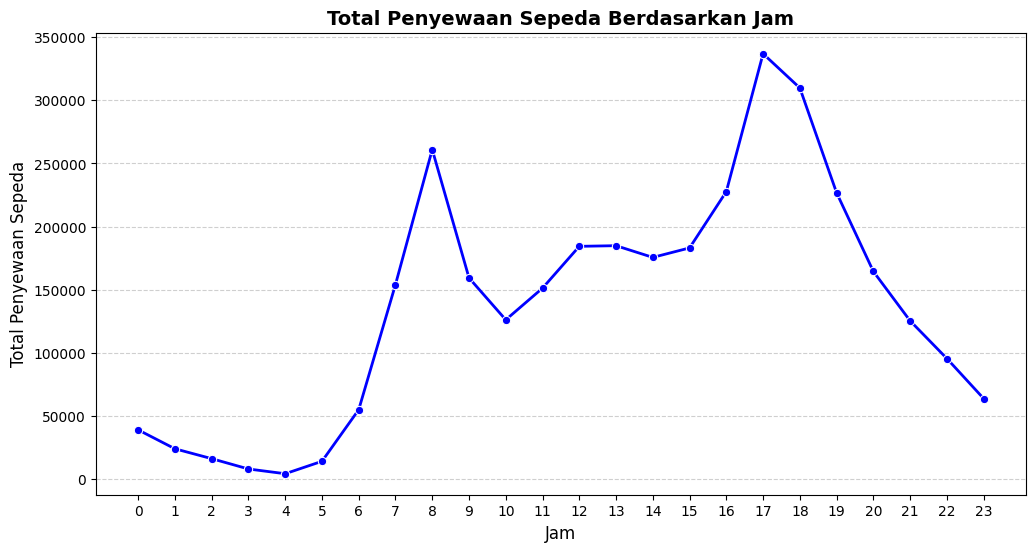

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(f"Jumlah total baris dalam hour_df: {len(hour_df)}")
rentals_by_hour = hour_df.groupby("hour", observed=True, as_index=False)["total_rentals"].sum()
print("Cek jumlah total penyewaan berdasarkan jam:")
display(rentals_by_hour)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=rentals_by_hour,
    x="hour",
    y="total_rentals",
    marker="o",
    color="blue",
    linewidth=2
)

plt.title("Total Penyewaan Sepeda Berdasarkan Jam", fontsize=14, fontweight="bold")
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

**Jam Sibuk Penyewaan Sepeda:**

Penyewaan tertinggi terjadi pada pukul 17:00 (336.860 penyewaan) dan pukul 18:00 (309.772 penyewaan).
Peningkatan tajam juga terjadi pada pagi hari sekitar pukul 07:00 (154.171 penyewaan) dan pukul 08:00 (261.001 penyewaan). Hal ini dapat menunjukkan bahwa penyewaan sepeda sangat tinggi saat jam orang beraktifitas seperti berangkat kerja, sekolah dan lain lain(07:00 - 09:00) dan jam pulang (16:00 - 18:00).

**Jam dengan Penyewaan Terendah:**

Jam dengan jumlah penyewaan paling sedikit terjadi pada pukul 04:00 (4.428 penyewaan) dan pukul 03:00 (8.174 penyewaan). Kemudian baru mengalami peningkatan setelah pukul 05:00 (14.261 penyewaan), yang kemungkinan besar karena orang-orang mulai bersiap untuk aktivitas pagi.

**Pola Penyewaan Sepeda Sehari-Hari:**

Penyewaan meningkat setelah pukul 05:00 dan mencapai puncaknya pada pagi dan sore hari.
Setelah pukul 18:00, penyewaan mulai turun secara bertahap.

**Rekomendasi Berdasarkan Analisis:**

- Memastikan stok sepeda selalu tersedia, terutama di area perkantoran, stasiun, dan pusat aktivitas lainnya di saat jam sibuk yaitu pada pkl 07:00 - 09:00 dan 16:00 - 18:00.
- Untuk meningkatkan penyewaan di luar jam sibuk (siang dan malam), bisa dengan menawarkan tarif lebih murah atau promo khusus di rentang 10:00 - 15:00 dan setelah 19:00 namun dengan slot terbatas.
- Melakukan kerjasama dengan tempat wisata atau pusat perbelanjaan untuk mendorong lebih banyak penyewaan di luar jam sibuk.
- Waktu penyewaan rendah antara 00:00 - 05:00 bisa dimanfaatkan untuk melakukan maintenance dan perbaikan sepeda agar siap digunakan di jam sibuk.


 **Rata - rata Penyewaan Sepeda per Jam**

Tabel Rata-rata Penyewaan Sepeda per Jam:


,hour,total_rentals
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


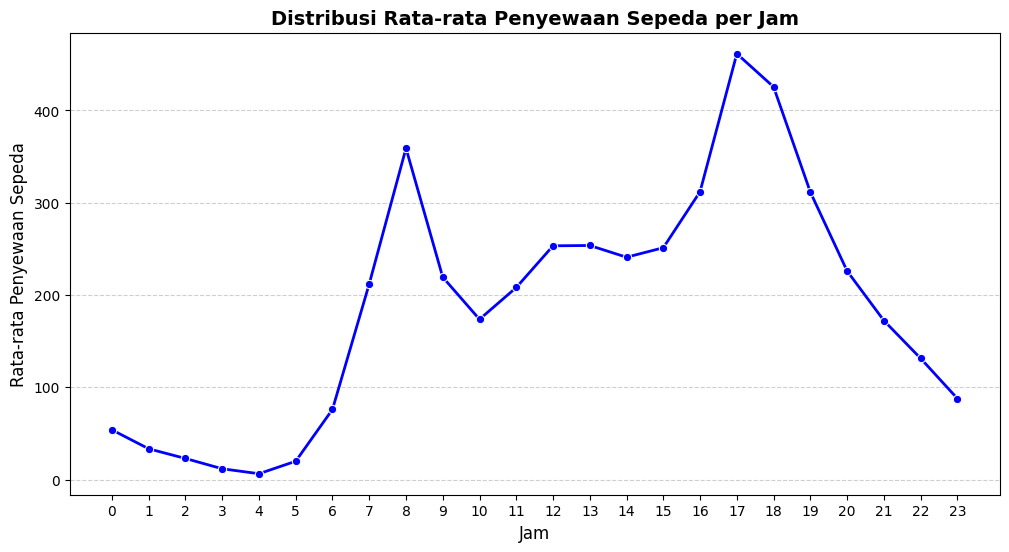

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

rentals_by_hour = hour_df.groupby("hour", observed=True, as_index=False)["total_rentals"].mean()
print("Tabel Rata-rata Penyewaan Sepeda per Jam:")
display(rentals_by_hour)


plt.figure(figsize=(12, 6))
sns.lineplot(
    data=rentals_by_hour,
    x="hour",
    y="total_rentals",
    marker="o",
    color="blue",
    linewidth=2
)

plt.title("Distribusi Rata-rata Penyewaan Sepeda per Jam", fontsize=14, fontweight="bold")
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

**Pola Umum Penyewaan Sepeda**

Rata-rata penyewaan sepeda terendah terjadi antara pukul 00:00 - 05:00, dengan nilai paling kecil pada pukul 04:00 (6 penyewa). Dan penyewaan mulai meningkat setelah pukul 05:00 (20 penyewa), dan melonjak signifikan setelah pukul 06:00.

Puncak penyewaan terjadi pada pukul 17:00 (461 penyewa), diikuti oleh pukul 18:00 (426 penyewa), menandakan jam pulang kerja sebagai periode paling sibuk.

**Rekomendasi**

- Memastikan stok sepeda selalu tersedia, terutama di area perkantoran, stasiun, dan pusat aktivitas lainnya di saat jam sibuk yaitu pada pkl 07:00 - 09:00 dan 16:00 - 18:00.
- Untuk meningkatkan penyewaan di luar jam sibuk (siang dan malam), bisa dengan menawarkan tarif lebih murah atau promo khusus di rentang 10:00 - 15:00 dan setelah 19:00 namun dengan slot terbatas.
- Melakukan kerjasama dengan tempat wisata atau pusat perbelanjaan untuk mendorong lebih banyak penyewaan di luar jam sibuk.
- Waktu penyewaan rendah antara 00:00 - 05:00 bisa dimanfaatkan untuk melakukan maintenance dan perbaikan sepeda agar siap digunakan di jam sibuk.

**Perbandingan Jumlah Penyewaan antara Hari Kerja vs Hari Libur**

Tabel Total Penyewaan Sepeda antara Hari Kerja vs Hari Libur:


,working_day,total_rentals
0,Hari Libur,1000269
1,Hari Kerja,2292410


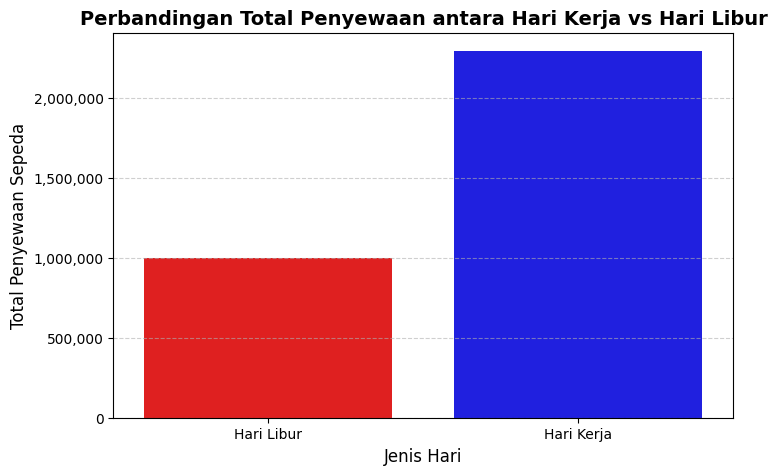

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker

rentals_by_day_type = day_df.groupby("working_day", observed=True)["total_rentals"].sum().reset_index()
rentals_by_day_type["working_day"] = rentals_by_day_type["working_day"].map({0: "Hari Libur", 1: "Hari Kerja"})
print("Tabel Total Penyewaan Sepeda antara Hari Kerja vs Hari Libur:")
display(rentals_by_day_type)

color_mapping = {"Hari Libur": "red", "Hari Kerja": "blue"}

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=rentals_by_day_type,
    x="working_day",
    y="total_rentals",
    hue="working_day",
    palette=color_mapping,
    legend=False
)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.title("Perbandingan Total Penyewaan antara Hari Kerja vs Hari Libur", fontsize=14, fontweight="bold")
plt.xlabel("Jenis Hari", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

**Jumlah Penyewaan Lebih Tinggi pada Hari Kerja**

Total penyewaan sepeda pada hari kerja mencapai 2.294.210 penyewaan, hal ini artinya jauh lebih tinggi dibandingkan dengan hari libur dengan jum1ah 1.000.269 penyewaan. Dengan demikian dapat menunjukkan bahwa mayoritas pengguna memanfaatkan sepeda sebagai alat transportasi utama di hari kerja, kemungkinan besar untuk keperluan perjalanan ke kantor, sekolah, atau aktivitas harian lainnya.

**Penurunan Penyewaan pada Hari Libur**

Penyewaan sepeda pada hari libur hanya sekitar 44% dari total penyewaan pada hari kerja, yang menunjukkan bahwa penggunaan sepeda di akhir pekan atau hari libur cenderung lebih rendah. Kemungkinan besar, pengguna memiliki alternatif transportasi lain saat libur atau lebih memilih aktivitas yang tidak melibatkan perjalanan jauh.

**Rekomendasi**


- Menyediakan promo diskon atau tarif lebih murah pada hari libur untuk menarik lebih banyak pengguna. Atau dengan mengadakan event bersepeda seperti "Car Free Day"  untuk meningkatkan kesadaran masyarakat dalam menggunakan sepeda saat hari libur.
- Menawarkan layanan rental harian dengan paket khusus untuk perjalanan keluarga atau komunitas bersepeda di akhir pekan.
- Bekerja sama dengan tempat wisata atau pusat hiburan untuk menyediakan layanan rental sepeda yang lebih mudah diakses oleh pengunjung. Misalnya, dengan menawarkan paket penyewaan sepeda + tiket masuk tempat wisata dengan harga lebih terjangkau.

**Jumlah Penyewaan Sepeda berdasarkan Bulan**

Tabel Total Penyewaan Sepeda Berdasarkan Bulan:


,month,total_rentals
0,Jan,134933
1,Feb,151352
2,Mar,228920
3,Apr,269094
4,May,331686
5,Jun,346342
6,Jul,344948
7,Aug,351194
8,Sep,345991
9,Oct,322352


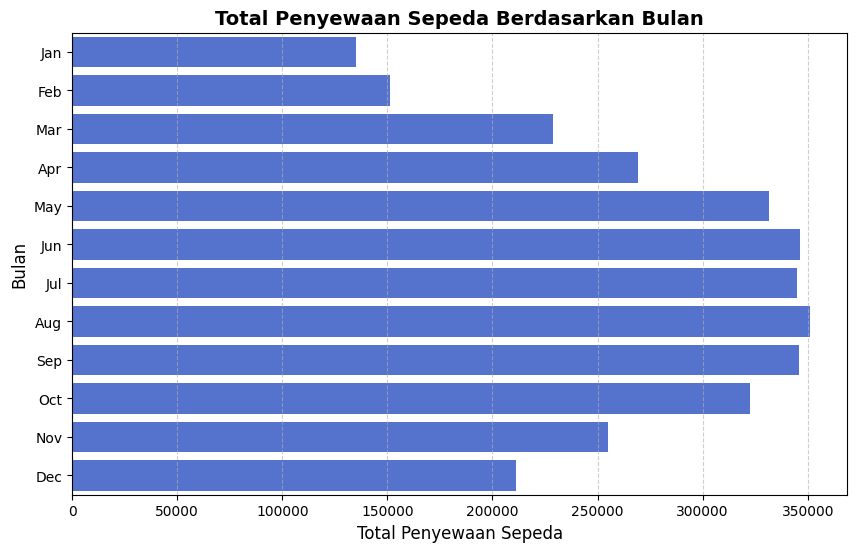

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

rentals_by_month = day_df.groupby("month", observed=True)["total_rentals"].sum().reset_index()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
rentals_by_month["month"] = pd.Categorical(rentals_by_month["month"], categories=month_order, ordered=True)
rentals_by_month = rentals_by_month.sort_values("month")

print("Tabel Total Penyewaan Sepeda Berdasarkan Bulan:")
display(rentals_by_month)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=rentals_by_month,
    y="month",
    x="total_rentals",
    color="royalblue",
    orient="h"
)

plt.title("Total Penyewaan Sepeda Berdasarkan Bulan", fontsize=14, fontweight="bold")
plt.ylabel("Bulan", fontsize=12)
plt.xlabel("Total Penyewaan Sepeda", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

**Puncak Penyewaan Terjadi pada Bulan Agustus**

Bulan Agustus memiliki penyewaan tertinggi, yaitu sekitar 351.194 penyewaan.Kemudian disusul oleh bulan Juni (346.342), September (345.991), dan Juli (344.948).

**Penyewaan Rendah Terjadi di Awal Tahun**

Januari memiliki jumlah penyewaan terendah, yaitu 134.933 penyewaan, diikuti oleh Februari (151.352 penyewaan). Hal ini kemungkinan disebabkan oleh cuaca yang kurang mendukung, seperti musim hujan atau suhu dingin yang membuat orang lebih memilih moda transportasi lain.

**Penurunan Signifikan di Akhir Tahun**

Penyewaan mulai mengalami penurunan di bulan November (254.831) dan Desember (211.036). Penurunan ini bisa disebabkan oleh perubahan cuaca dan mendekati musim liburan akhir tahun, di mana orang lebih banyak berpergian menggunakan kendaraan pribadi atau transportasi lain.

**Rekomendasi**

- Menawarkan paket berlangganan bulanan dengan harga lebih murah agar pengguna tetap menggunakan layanan meskipun cuaca kurang mendukung.
-  Menyediakan jasa tambahan seperti jas hujan atau pelindung sepeda agar tetap nyaman digunakan di musim hujan.
- Mengadakan program liburan akhir tahun dengan paket penyewaan yang lebih fleksibel, seperti penyewaan sepeda untuk keluarga atau wisatawan.
- Bekerja sama dengan destinasi wisata atau pusat perbelanjaan untuk meningkatkan penggunaan sepeda sebagai transportasi alternatif.
- Menawarkan program loyalitas atau reward bagi pengguna yang sering menyewa selama bulan-bulan sibuk.


**Rata - rata Penyewaan Sepeda berdasarkan Bulan**

Tabel Rata-rata Penyewaan Sepeda Berdasarkan Bulan:


,month,total_rentals
0,Jan,2176.338710
1,Feb,2655.298246
2,Mar,3692.258065
3,Apr,4484.900000
4,May,5349.774194
5,Jun,5772.366667
6,Jul,5563.677419
7,Aug,5664.419355
8,Sep,5766.516667
9,Oct,5199.225806


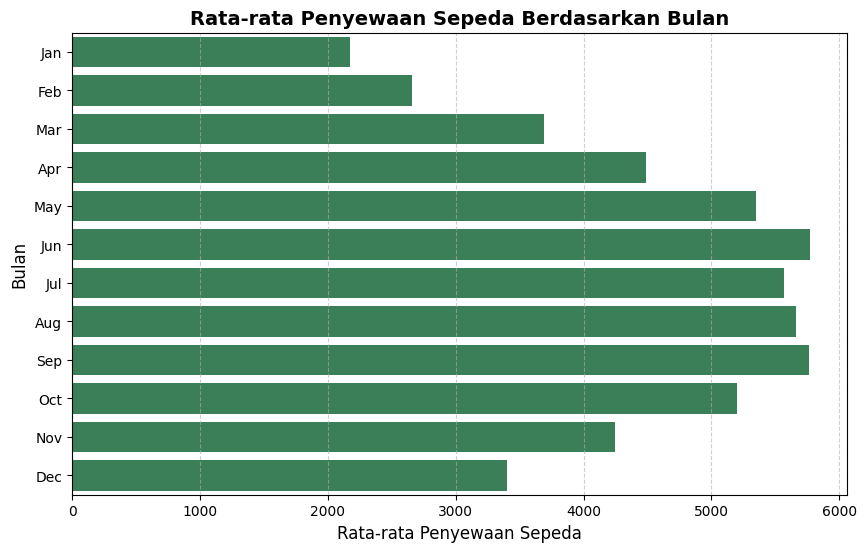

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

avg_rentals_by_month = day_df.groupby("month", observed=True)["total_rentals"].mean().reset_index()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_rentals_by_month["month"] = pd.Categorical(avg_rentals_by_month["month"], categories=month_order, ordered=True)
avg_rentals_by_month = avg_rentals_by_month.sort_values("month")

print("Tabel Rata-rata Penyewaan Sepeda Berdasarkan Bulan:")
display(avg_rentals_by_month)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_rentals_by_month,
    y="month",
    x="total_rentals",
    color="seagreen",
    orient="h"
)

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Bulan", fontsize=14, fontweight="bold")
plt.ylabel("Bulan", fontsize=12)
plt.xlabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

**Puncak Rata-rata Penyewaan Terjadi di Bulan Juni dan September**

Bulan Juni mencatat rata-rata tertinggi, yaitu sekitar 5.772 penyewaan per hari.Bulan lainnya dengan rata-rata tinggi adalah September (5.767), Agustus (5.664), dan Juli (5.564). Pola ini menunjukkan bahwa musim panas atau kondisi cuaca yang lebih baik mendorong peningkatan penggunaan sepeda.

**Bulan dengan Rata-rata Penyewaan Rendah**

Januari mencatat rata-rata penyewaan terendah, yaitu 2.176 penyewaan, diikuti oleh Februari (2.655) dan Desember (3.404). Rendahnya angka ini kemungkinan disebabkan oleh faktor cuaca seperti musim hujan atau suhu yang lebih dingin.

**Penurunan Rata-rata Penyewaan di Akhir Tahun**

Setelah mencapai puncaknya di bulan Juni-September, rata-rata penyewaan mulai menurun pada bulan Oktober (5.199), November (4.247), dan Desember (3.404). Hal ini bisa dikaitkan dengan kondisi cuaca yang mulai kurang bersahabat serta perubahan aktivitas masyarakat menjelang akhir tahun.

**Rekomendasi :**

- Memastikan stok sepeda cukup untuk memenuhi permintaan tinggi di bulan Juni hingga September.
- melakukan pemeliharaan sepeda di bulan dengan rata-rata penyewaan rendah
- Menawarkan diskon dan promo di bulan Januari, Februari, dan Desember agar lebih banyak orang tertarik untuk menyewa.
- Menyediakan paket penyewaan jangka panjang dengan harga lebih terjangkau untuk menarik pelanggan tetap di musim sepi.


**Jumlah Penyewaan Sepeda berdasarkan Hari dalam Seminggu**

Tabel Total Penyewaan Sepeda dalam Seminggu:


,one_of_week,total_rentals
0,Sun,444027
1,Mon,455503
2,Tue,469109
3,Wed,473048
4,Thu,485395
5,Fri,487790
6,Sat,477807


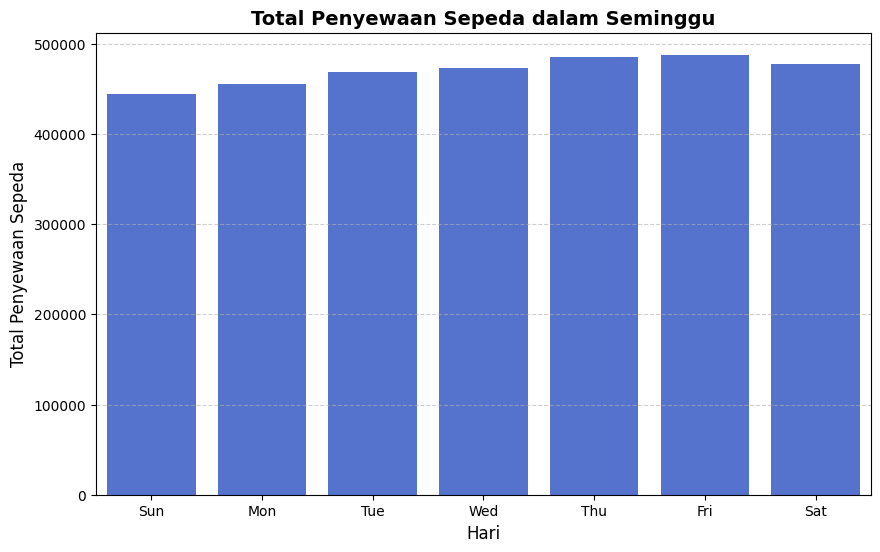

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_rentals_by_weekday = (
    day_df.groupby("one_of_week", observed=True)["total_rentals"]
    .sum()
    .reset_index()
)

order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
total_rentals_by_weekday["one_of_week"] = pd.Categorical(
    total_rentals_by_weekday["one_of_week"], categories=order, ordered=True
)
total_rentals_by_weekday = total_rentals_by_weekday.sort_values("one_of_week")

print("Tabel Total Penyewaan Sepeda dalam Seminggu:")
display(total_rentals_by_weekday)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_rentals_by_weekday,
    x="one_of_week",
    y="total_rentals",
    color="royalblue",
)

plt.title("Total Penyewaan Sepeda dalam Seminggu", fontsize=14, fontweight="bold")
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

**Hari dengan Penyewaan Sepeda Tertinggi**

Jumat (487.790 penyewaan) dan Kamis (485.395 penyewaan) memiliki jumlah penyewaan tertinggi.
Hal ini menunjukkan bahwa permintaan sepeda meningkat menjelang akhir minggu kerja,kemungkinan karena orang mulai mempersiapkan aktivitas akhir pekan atau melakukan perjalanan lebih sering.

**Hari dengan Penyewaan Sepeda Terendah**

Minggu memiliki jumlah penyewaan paling sedikit, yaitu 444.027 penyewaan.Hal ini bisa disebabkan oleh aktivitas masyarakat yang memilih untuk beristirahat atau menggunakan moda transportasi lain untuk berlibur.

**Distribusi Relatif Stabil Sepanjang Minggu**

Tidak ada perbedaan yang terlalu signifikan dalam jumlah penyewaan per hari. Sehingga hal ini menunjukkan bahwa penyewaan sepeda cukup konsisten dengan sedikit peningkatan pada hari kerja dibandingkan akhir pekan.

**Rekomendasi :**

- Mengadakan promo atau diskon penyewaan di hari minggu untuk meningkatkan jumlah pelanggan.
- Berkolaborasi dengan tempat wisata atau taman kota untuk menyediakan jalur sepeda pada akhir pekan.
- Memastikan sepeda dalam kondisi prima dan tersedia dalam jumlah cukup.
- melakukan perawatan sepeda di awal minggu (Senin–Rabu) agar sepeda siap digunakan saat permintaan meningkat.
- Menawarkan paket langganan mingguan atau bulanan yang memberikan fleksibilitas penggunaan di hari kerja dan akhir pekan.
- Meningkatkan insentif bagi pengguna tetap yang sering menyewa di hari kerja agar lebih loyal terhadap layanan penyewaan.

**Rata - rata Penyewaan Sepeda berdasarkan Hari dalam Seminggu**

Tabel Rata-rata Penyewaan Sepeda dalam Seminggu:


,one_of_week,total_rentals
0,Sun,4228.828571
1,Mon,4338.123810
2,Tue,4510.663462
3,Wed,4548.538462
4,Thu,4667.259615
5,Fri,4690.288462
6,Sat,4550.542857


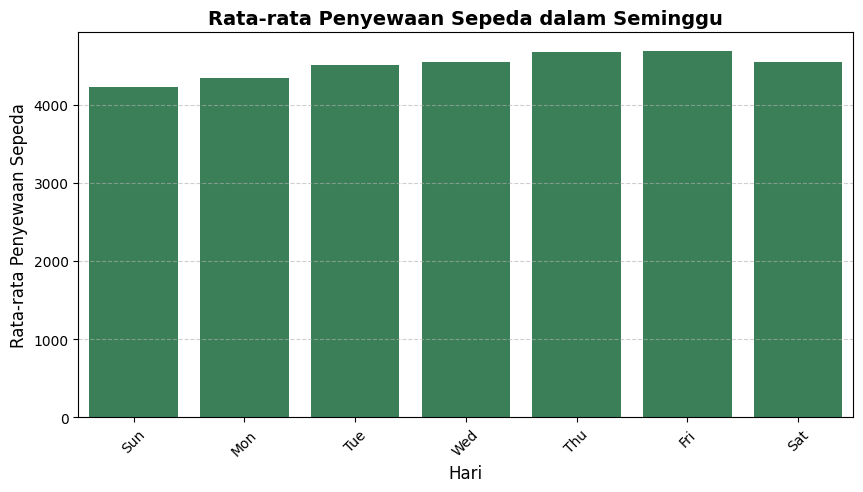

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_rentals_by_weekday = (
    day_df.groupby("one_of_week", observed=False)["total_rentals"]
    .mean()
    .reset_index()
)

order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
avg_rentals_by_weekday["one_of_week"] = pd.Categorical(
    avg_rentals_by_weekday["one_of_week"], categories=order, ordered=True
)
avg_rentals_by_weekday = avg_rentals_by_weekday.sort_values("one_of_week")

print("Tabel Rata-rata Penyewaan Sepeda dalam Seminggu:")
display(avg_rentals_by_weekday)

plt.figure(figsize=(10, 5))

sns.barplot(
    data=avg_rentals_by_weekday,
    x="one_of_week",
    y="total_rentals",
    color="seagreen",
)

plt.title("Rata-rata Penyewaan Sepeda dalam Seminggu", fontsize=14, fontweight="bold")
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

**Hari dengan Rata-rata Penyewaan Tertinggi**

Hari Jumat (4.690 penyewaan/hari) dan Kamis (4.667 penyewaan/hari) merupakan rata-rata penyewaan tertinggi.

**Hari dengan Rata-rata Penyewaan Terendah**

Minggu memiliki rata-rata penyewaan paling sedikit, yaitu 4.229 penyewaan/hari.Hal ini menunjukkan bahwa meskipun akhir pekan tetap memiliki jumlah penyewaan yang lumayan besar meskipun intensitasnya sedikit lebih rendah dibanding hari kerja.

**Distribusi Penyewaan yang Stabil**

Selisih rata-rata penyewaan antar hari tidak terlalu besar, menunjukkan bahwa penggunaan sepeda tetap konsisten sepanjang minggu.

**Rekomendasi:**

- Menawarkan diskon atau paket hemat di hari Minggu untuk menarik lebih banyak pengguna.
- Berkolaborasi dengan tempat wisata atau taman kota untuk menarik lebih banyak pesepeda.
- melakukan pemeliharaan sepeda di awal minggu agar sepeda dalam kondisi prima menjelang puncak penggunaan.
- Menyediakan rute khusus atau event bersepeda untuk meningkatkan minat penyewaan di akhir pekan.


**Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca**

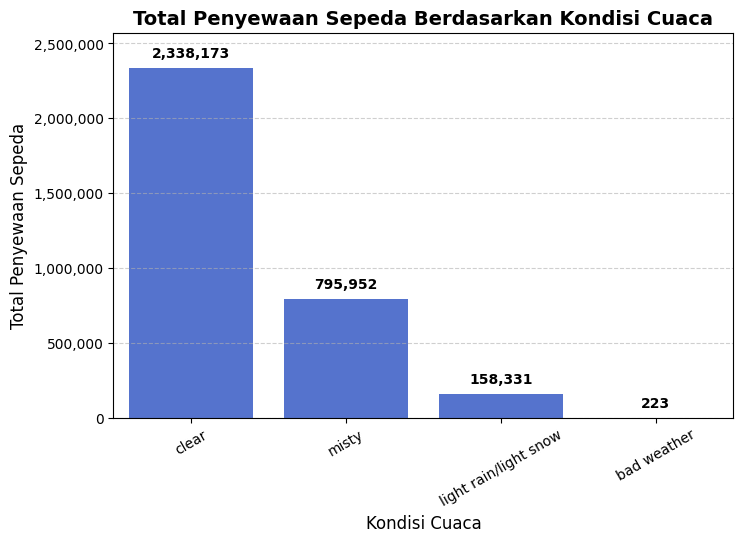

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

total_rentals_by_weather = hour_df.groupby('weather_condition', observed=True)['total_rentals'].sum().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=total_rentals_by_weather,
    x="weather_condition",
    y="total_rentals",
    color="royalblue"
)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height()):,}",
        (p.get_x() + p.get_width() / 2, p.get_height() + 50000),
        ha="center", va="bottom", fontsize=10, color="black", weight="bold"
    )

ax.set_ylim(0, total_rentals_by_weather["total_rentals"].max() * 1.1)

plt.title("Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca", fontsize=14, fontweight="bold")
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

**Cuaca Cerah (Clear)**

Dengan 2.338.173 penyewaan, kondisi cuaca cerah menjadi waktu favorit bagi penyewa sepeda. Hal ini karena bersepeda lebih aman dan nyaman saat cuaca cerah.

**Cuaca Berkabut (Misty)**

Tercatat 795.952 penyewaan dalam kondisi berkabut.
Meskipun jarak pandang bisa sedikit terganggu, hal ini menunjukkan bahwa pengguna tetap aktif menyewa sepeda.

**Cuaca Hujan Ringan/Salju**

Terdapat 158.331 penyewaan hal ini kemungkinan
pengguna menghindari risiko licin atau basah ketika berkendara.

**Cuaca Buruk**

Terdapat total 223 penyewaan menunjukkan bahwa mayoritas pengguna lebih memilih tidak bersepeda saat cuaca ekstrem karena dapat membahayakan keselamatan dan mengganggu kenyamanan saat berkendara.

**Rekomendasi :**
- Menawarkan insentif saat cuaca tidak ideal misalkan dengan memberikan diskon atau promo khusus untuk penyewaan di kondisi berkabut atau hujan ringan.
- Menyediakan jas hujan gratis atau layanan sewa jas hujan untuk meningkatkan kenyamanan pengguna.

**Rata - rata Penyewaan Sepeda berdasarkan Kondisi Cuaca**

       weather_condition  total_rentals
0                  clear     204.869272
1                  misty     175.165493
2  light rain/light snow     111.579281
3            bad weather      74.333333


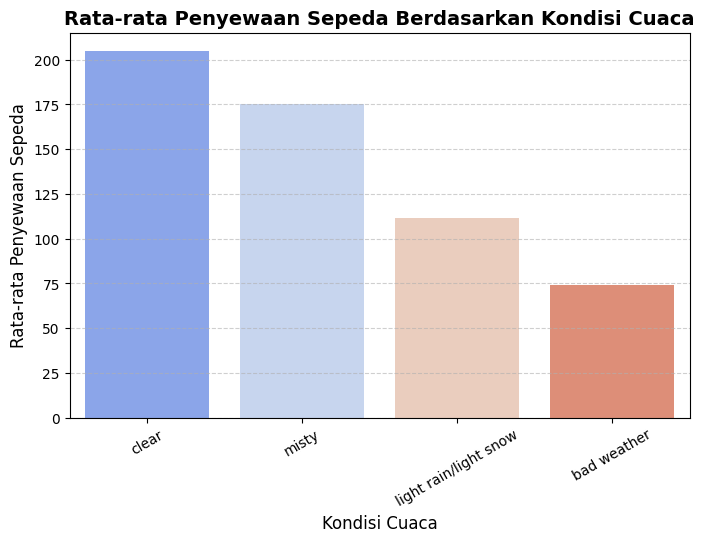

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

avg_rentals_by_weather = hour_df.groupby('weather_condition', observed=True)['total_rentals'].mean().reset_index()

print(avg_rentals_by_weather)

palette = sns.color_palette("coolwarm", n_colors=len(avg_rentals_by_weather))

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=avg_rentals_by_weather,
    x="weather_condition",
    y="total_rentals",
    hue="weather_condition",
    palette=palette,
    legend=False
)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca", fontsize=14, fontweight="bold")
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

**Cuaca Cerah (Clear)**

Rata-rata 205 penyewaan per hari, menunjukkan bahwa pengguna sangat aktif saat cuaca cerah dan dapat menjadi indikasi utama bahwa cuaca cerah sangat mendukung aktivitas bersepeda.

**Cuaca Berkabut (Misty)**

Dengan 175 penyewaan per hari, kondisi berkabut tidak terlalu menghambat pengguna untuk bersepeda.
Hal ini mungkin karena kabut ringan masih memungkinkan visibilitas yang cukup baik.

**Cuaca Hujan Ringan/Salju Ringan**

Rata-rata 112 penyewaan per hari, menurun cukup signifikan dibandingkan kondisi berkabut.
Pengguna kemungkinan menghindari hujan karena risiko jalan licin atau basah.

**Cuaca Buruk**

Hanya 74 penyewaan per hari, yang berarti sebagian besar pengguna memilih untuk tidak bersepeda saat kondisi ekstrem karena faktor keselamatan dan kenyamanan menjadi alasan utama.

**Rekomendasi :**

- Menyediakan sepeda dengan pelindung air atau ban anti-selip untuk meningkatkan keamanan saat hujan.
- Menawarkan promo khusus untuk pengguna yang tetap menyewa sepeda meskipun cuaca mendung atau berkabut.

**Perbandingan Jumlah Penyewa Registered vs Casual**

Registered    2672662
Casual         620017
dtype: int64


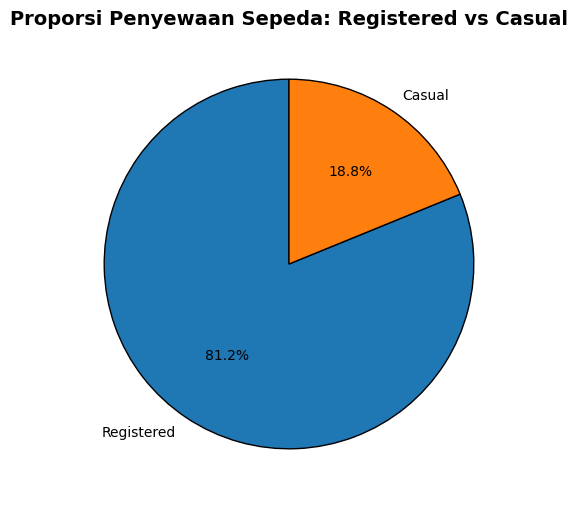

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

total_rentals_by_user = hour_df[['registered_rentals', 'casual_rentals']].sum()
total_rentals_by_user.index = ['Registered', 'Casual']

print(total_rentals_by_user)

colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(6, 6))
plt.pie(
    total_rentals_by_user,
    labels=total_rentals_by_user.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Proporsi Penyewaan Sepeda: Registered vs Casual", fontsize=14, fontweight="bold")

plt.show()

**Sebagian Besar Penyewa adalah Pengguna Terdaftar (Registered)**

81.2% dari total penyewaan berasal dari pengguna yang sudah terdaftar.Hal ini menunjukkan bahwa mayoritas pengguna lebih memilih berlangganan atau memiliki akun tetap untuk menyewa sepeda.

**Jumlah Penyewa Casual Relatif Kecil (18.8%)**

620.017 penyewaan berasal dari pengguna casual (tidak terdaftar).Jenis Pengguna ini mungkin hanya menyewa sesekali atau tidak ingin berlangganan.

**Rekomendasi :**
- Menawarkan diskon penyewaan pertama atau paket keanggotaan murah untuk menarik pengguna casual agar mendaftar.
- Menyediakan langganan harian atau mingguan bagi mereka yang tidak ingin berlangganan tahunan.
- Menawarkan fitur akses prioritas atau asuransi ringan bagi pengguna terdaftar agar lebih menarik dibanding casual.

**Perbandingan Tren Penyewaan Sepeda pada Tahun 2011 vs 2012**

Total Penyewaan Sepeda per Tahun:
   year  total_rentals
0  2011        1243103
1  2012        2049576


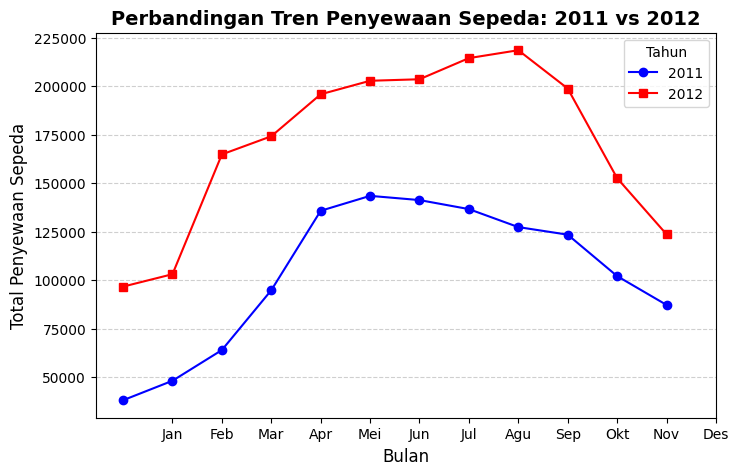

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

monthly_trend = day_df.groupby(["year", "month"], observed=True)["total_rentals"].sum().reset_index()

total_per_year = day_df.groupby("year")["total_rentals"].sum()

print("Total Penyewaan Sepeda per Tahun:")
print(total_per_year.to_frame().reset_index())

plt.figure(figsize=(8, 5))

plt.plot(
    monthly_trend[monthly_trend["year"] == 2011]["month"],
    monthly_trend[monthly_trend["year"] == 2011]["total_rentals"],
    marker="o", linestyle="-", color="blue", label="2011"
)

plt.plot(
    monthly_trend[monthly_trend["year"] == 2012]["month"],
    monthly_trend[monthly_trend["year"] == 2012]["total_rentals"],
    marker="s", linestyle="-", color="red", label="2012"
)

plt.title("Perbandingan Tren Penyewaan Sepeda: 2011 vs 2012", fontsize=14, fontweight="bold")
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.legend(title="Tahun")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

Grafik menunjukkan bahwa total penyewaan sepeda meningkat signifikan dari **1.243.103** pada tahun **2011** menjadi **2.049.576** pada tahun **2012**, dengan kenaikan lebih dari **800.000 penyewaan**. Tren bulanan di kedua tahun mengikuti pola serupa, dengan peningkatan mulai Maret, mencapai puncak di musim panas (Mei–September), dan menurun menjelang akhir tahun. Namun, jumlah penyewaan di **2012** jauh lebih tinggi dibandingkan **2011**, menunjukkan pertumbuhan pengguna atau faktor lain seperti promosi atau kondisi cuaca yang lebih mendukung.

**Korelasi Antara Suhu, Kondisi Cuaca, Musim, Kelembaban, Kecepatan Angin dan Jumlah Penyewaan**

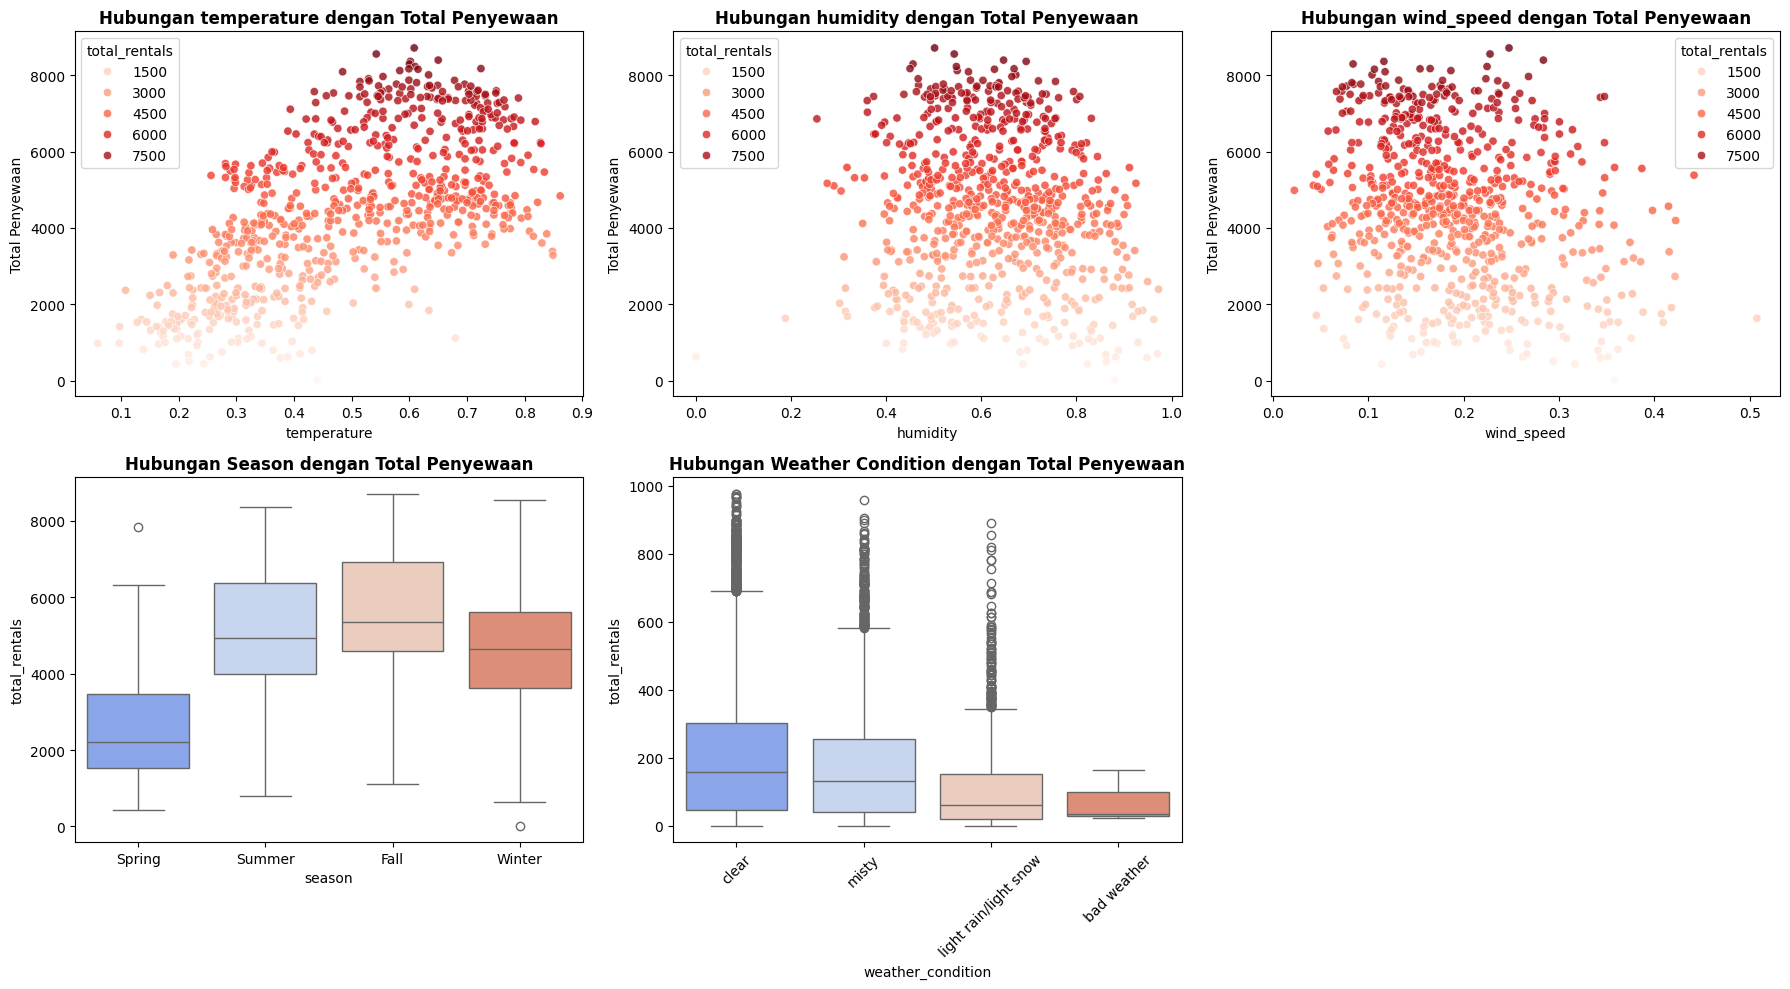

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
features = ["temperature", "humidity", "wind_speed"]

for i, feature in enumerate(features):
    sns.scatterplot(
        ax=axes[0, i],
        data=day_df,
        x=feature,
        y="total_rentals",
        hue="total_rentals",
        palette="Reds",
        alpha=0.8,
    )
    axes[0, i].set_title(f"Hubungan {feature} dengan Total Penyewaan", fontsize=12, fontweight="bold")
    axes[0, i].set_xlabel(feature, fontsize=10)
    axes[0, i].set_ylabel("Total Penyewaan", fontsize=10)

sns.boxplot(ax=axes[1, 0], data=day_df, x="season", y="total_rentals", hue="season", palette="coolwarm", dodge=False)
axes[1, 0].set_title("Hubungan Season dengan Total Penyewaan", fontsize=12, fontweight="bold")

if axes[1, 0].get_legend() is not None:
    axes[1, 0].get_legend().remove()

sns.boxplot(ax=axes[1, 1], data=hour_df, x="weather_condition", y="total_rentals", hue="weather_condition", palette="coolwarm", dodge=False)
axes[1, 1].set_title("Hubungan Weather Condition dengan Total Penyewaan", fontsize=12, fontweight="bold")

if axes[1, 1].get_legend() is not None:
    axes[1, 1].get_legend().remove()

axes[1, 1].tick_params(axis="x", rotation=45)
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

Berdasarkan visualisasi, terdapat beberapa pola menarik dalam hubungan antara faktor cuaca dan jumlah penyewaan sepeda. Suhu memiliki korelasi positif dengan jumlah penyewaan, di mana jumlah penyewaan meningkat seiring kenaikan suhu hingga titik tertentu. Kelembaban menunjukkan pola yang lebih kompleks, tetapi pada tingkat kelembaban tinggi, jumlah penyewaan cenderung menurun. Kecepatan angin tampaknya tidak memiliki pengaruh yang signifikan terhadap penyewaan sepeda. Dari sisi musim, jumlah penyewaan tertinggi terjadi pada musim panas dan gugur, sementara musim semi memiliki jumlah penyewaan terendah. Untuk kondisi cuaca, penyewaan sepeda paling tinggi terjadi pada cuaca cerah dan menurun saat kondisi cuaca memburuk, terutama pada hujan ringan/salju ringan dan cuaca buruk. Hal ini menunjukkan bahwa faktor cuaca dan musim memainkan peran penting dalam menentukan tingkat penyewaan sepeda.

Berdasarkan hasil exploratory data analysis (EDA), terdapat beberapa insight penting yang dapat digunakan untuk strategi operasional dan pengambilan keputusan dalam layanan penyewaan sepeda:  

1. **Pengaruh Cuaca terhadap Penyewaan**  
   - Penyewaan sepeda jauh lebih tinggi saat cuaca cerah dibandingkan saat hujan atau salju. Oleh karena itu, strategi promosi dapat difokuskan pada musim dengan cuaca baik, sementara insentif seperti diskon atau perlengkapan tambahan (misalnya jas hujan) bisa diberikan saat cuaca buruk untuk tetap menarik pengguna.  

2. **Pengaruh Suhu dan Musim**  
   - Musim panas dan gugur memiliki jumlah penyewaan tertinggi, sedangkan musim semi cenderung lebih rendah. Ini mengindikasikan bahwa operasional dapat disesuaikan dengan menambah jumlah sepeda selama puncak musim penyewaan dan mengurangi stok atau melakukan pemeliharaan selama musim dengan permintaan rendah.  

3. **Segmentasi Pengguna**  
   - Sebagian besar pengguna adalah pelanggan terdaftar (81,2%) dibandingkan dengan pengguna kasual (18,8%). Untuk meningkatkan pengguna kasual, dapat dilakukan kampanye pemasaran seperti promo akhir pekan atau diskon bagi pengguna baru untuk meningkatkan retensi dan konversi ke pelanggan tetap.  

4. **Tren Penyewaan Tahunan**  
   - Terjadi peningkatan signifikan dalam penyewaan dari tahun 2011 ke 2012, menunjukkan pertumbuhan layanan. Jika tren ini berlanjut, perlu dipersiapkan peningkatan kapasitas, seperti menambah sepeda atau memperluas titik penyewaan.  

5. **Faktor Lingkungan Lainnya**  
   - Kelembaban tinggi tampaknya mempengaruhi penyewaan sepeda, terutama saat lebih dari 80%. Dengan informasi ini, penyewaan bisa dipromosikan lebih agresif saat kelembaban sedang atau rendah, atau bahkan menyesuaikan jam operasional di hari-hari dengan kondisi yang lebih mendukung.  

Kesimpulannya, layanan penyewaan sepeda dapat dioptimalkan dengan strategi berbasis cuaca, musim, dan perilaku pelanggan. Fleksibilitas dalam operasional, pemasaran yang ditargetkan, dan pengelolaan stok yang efisien dapat meningkatkan kepuasan pelanggan dan pendapatan secara keseluruhan.

## **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Kapan waktu (jam) dengan jumlah penyewaan sepeda terbanyak?**

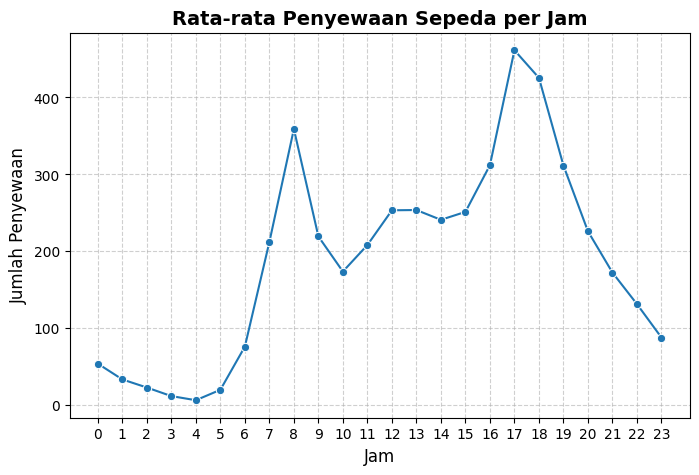

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

hourly_rentals = hour_df.groupby("hour")["total_rentals"].mean()
plt.figure(figsize=(8,5))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker="o")
plt.title("Rata-rata Penyewaan Sepeda per Jam", fontsize=14, fontweight="bold")
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Rata-rata penyewaan sepeda terendah terjadi antara pukul 00:00 - 05:00, dengan nilai paling kecil pada pukul 04:00 (6 penyewa). Dan penyewaan mulai meningkat setelah pukul 05:00 (20 penyewa), dan melonjak signifikan setelah pukul 06:00.

Puncak penyewaan terjadi pada pukul 17:00 (461 penyewa), diikuti oleh pukul 18:00 (426 penyewa), menandakan jam pulang kerja sebagai periode paling sibuk.

**Rekomendasi Untuk Optimalisasi Bisnis :**

- Memastikan stok sepeda selalu tersedia, terutama di area perkantoran, stasiun, dan pusat aktivitas lainnya di saat jam sibuk yaitu pada pkl 07:00 - 09:00 dan 16:00 - 18:00.
- Untuk meningkatkan penyewaan di luar jam sibuk (siang dan malam), bisa dengan menawarkan tarif lebih murah atau promo khusus di rentang 10:00 - 15:00 dan setelah 19:00 namun dengan slot terbatas.
- Melakukan kerjasama dengan tempat wisata atau pusat perbelanjaan untuk mendorong lebih banyak penyewaan di luar jam sibuk.
- Waktu penyewaan rendah antara 00:00 - 05:00 bisa dimanfaatkan untuk melakukan maintenance dan perbaikan sepeda agar siap digunakan di jam sibuk.

### **Pertanyaan 2: Pada bulan apa penyewaan sepeda banyak dilakukan?**

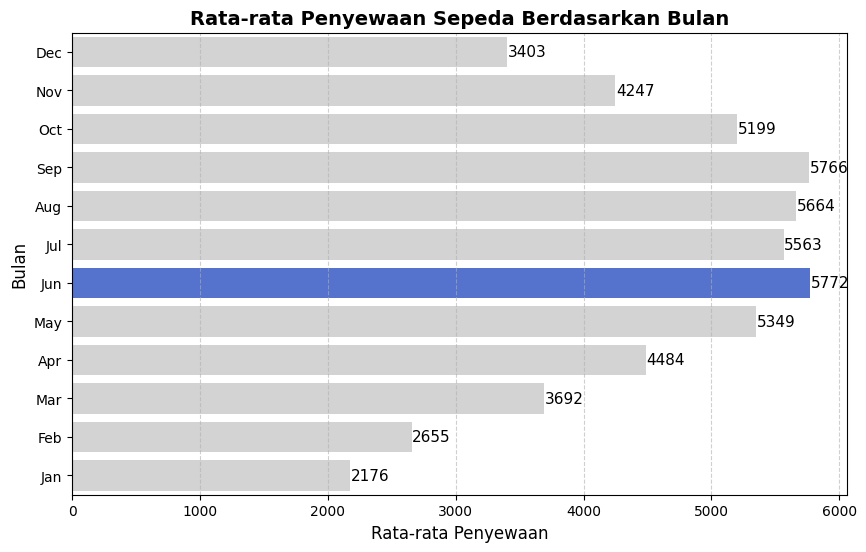

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_rentals_by_month = day_df.groupby('month', observed=True)['total_rentals'].mean().reset_index()

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

max_month = avg_rentals_by_month.loc[avg_rentals_by_month['total_rentals'].idxmax(), 'month']

colors = ['royalblue' if month == max_month else 'lightgray' for month in avg_rentals_by_month["month"]]

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    y=avg_rentals_by_month["month"],
    x=avg_rentals_by_month["total_rentals"],
    hue=avg_rentals_by_month["month"],
    palette=colors,
    orient="h",
    legend=False
)

for index, value in enumerate(avg_rentals_by_month["total_rentals"]):
    plt.text(value + 5, index, f"{int(value)}", va="center", fontsize=11)
plt.yticks(ticks=range(12), labels=month_labels)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Bulan", fontsize=14, fontweight="bold")
plt.ylabel("Bulan", fontsize=12)
plt.xlabel("Rata-rata Penyewaan", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.gca().invert_yaxis()
plt.show()

Berdasarkan visualisasi data yang ditampilkan, dapat disimpulkan bahwa penyewaan sepeda paling banyak terjadi pada **bulan Juni**. Hal ini ditunjukkan oleh batang berwarna biru yang memiliki nilai rata-rata penyewaan tertinggi, yaitu **5.772 penyewaan per hari.**

Secara umum, bulan-bulan musim panas seperti **Juni, Juli, dan Agustus** menunjukkan angka penyewaan yang tinggi, dengan rata-rata penyewaan lebih dari **5.500 penyewaan per hari**. Hal ini dapat disebabkan oleh cuaca yang lebih mendukung aktivitas luar ruangan serta adanya musim liburan yang meningkatkan minat masyarakat untuk bersepeda.

Sebaliknya, bulan dengan penyewaan terendah adalah **Januari**, dengan rata-rata **2.176 penyewaan per hari**, yang kemungkinan besar disebabkan oleh kondisi cuaca yang lebih dingin dan kurang kondusif untuk bersepeda.

**Rekomendasi untuk Optimalisasi Penyewaan Sepeda :**
- Mengantisipasi lonjakan permintaan dengan menambah unit sepeda dan memastikan kondisi sepeda dalam keadaan prima.
- Menerapkan tarif premium atau paket penyewaan spesial pada bulan-bulan dengan permintaan tinggi.
- Menawarkan diskon atau paket berlangganan mingguan/bulanan agar pelanggan tetap menggunakan layanan secara rutin.
- Menambah titik penyewaan di tempat wisata, taman kota, atau jalur sepeda favorit.
- Memberikan reward atau poin bagi pelanggan yang sering menyewa untuk meningkatkan retensi pelanggan.

## **Pertanyaan 3: Pada hari apa sepeda paling sedikit dan banyak yang disewa?**

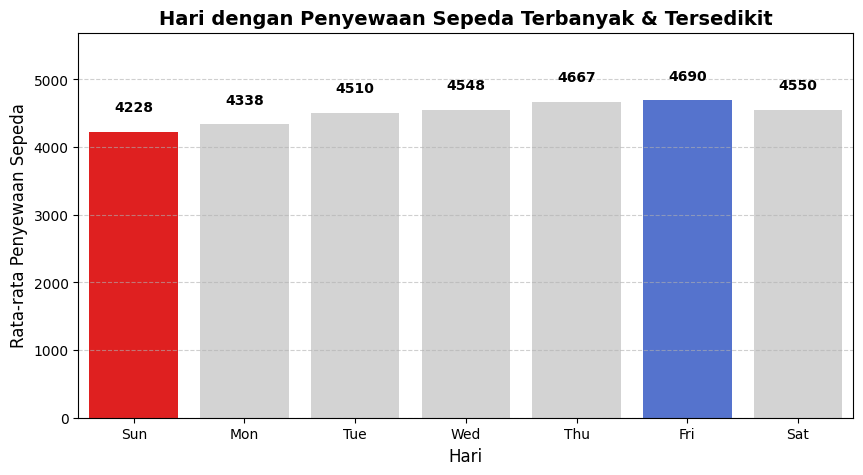

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_rentals_by_weekday = day_df.groupby('one_of_week', observed=True)['total_rentals'].mean().reset_index()

order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

max_day = avg_rentals_by_weekday.loc[avg_rentals_by_weekday['total_rentals'].idxmax(), 'one_of_week']
min_day = avg_rentals_by_weekday.loc[avg_rentals_by_weekday['total_rentals'].idxmin(), 'one_of_week']

colors = {day: 'lightgray' for day in order}
colors[max_day] = 'royalblue'
colors[min_day] = 'red'

plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=avg_rentals_by_weekday,
    x="one_of_week",
    y="total_rentals",
    order=order,
    hue="one_of_week",
    palette=colors,
    legend=False
)

for index, value in enumerate(avg_rentals_by_weekday["total_rentals"]):
    plt.text(index, value + 300, f"{int(value)}", ha="center", fontsize=10, fontweight="bold", color="black")

plt.title("Hari dengan Penyewaan Sepeda Terbanyak & Tersedikit", fontsize=14, fontweight="bold")
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, avg_rentals_by_weekday["total_rentals"].max() + 1000)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

Berdasarkan visualisasi data, terlihat bahwa **penyewaan sepeda paling sedikit** terjadi pada hari **Minggu** dengan rata-rata **4.228 penyewaan**. Hal ini mungkin disebabkan karena hari Minggu merupakan waktu bagi banyak orang untuk beristirahat atau menghabiskan waktu dengan aktivitas lain yang tidak memerlukan transportasi. Bisa jadi, pengguna utama sepeda adalah para pekerja dan mahasiswa yang lebih aktif bersepeda pada hari kerja, sehingga permintaan sepeda menurun pada hari libur.

Sebaliknya, **penyewaan sepeda paling banyak** terjadi pada hari **Jumat** dengan **rata-rata 4.690 **penyewaan. Hal ini dapat terjadi karena pada hari tersebut masih termasuk dalam hari kerja, di mana orang-orang tetap membutuhkan moda transportasi untuk bekerja atau kuliah. Selain itu, meningkatnya aktivitas sosial atau rekreasi menjelang akhir pekan juga bisa menjadi faktor yang menyebabkan lonjakan penyewaan sepeda pada hari Jumat.

**Melihat pola ini, ada beberapa strategi yang dapat diterapkan**. Untuk meningkatkan penyewaan sepeda pada hari Minggu, bisa dilakukan promosi khusus seperti diskon atau penawaran menarik yang mendorong lebih banyak orang untuk bersepeda di akhir pekan. Sementara itu, dengan tingginya permintaan pada hari Jumat, penting untuk memastikan ketersediaan sepeda yang cukup agar pelanggan tidak mengalami kesulitan dalam menyewa. Selain itu, menawarkan layanan tambahan seperti paket sewa jangka panjang atau bundling dengan layanan lain bisa menjadi cara yang efektif untuk memaksimalkan pendapatan di hari-hari dengan permintaan tinggi.









## **Pertanyaan 4: Di cuaca seperti apa sepeda paling sedikit disewa?**

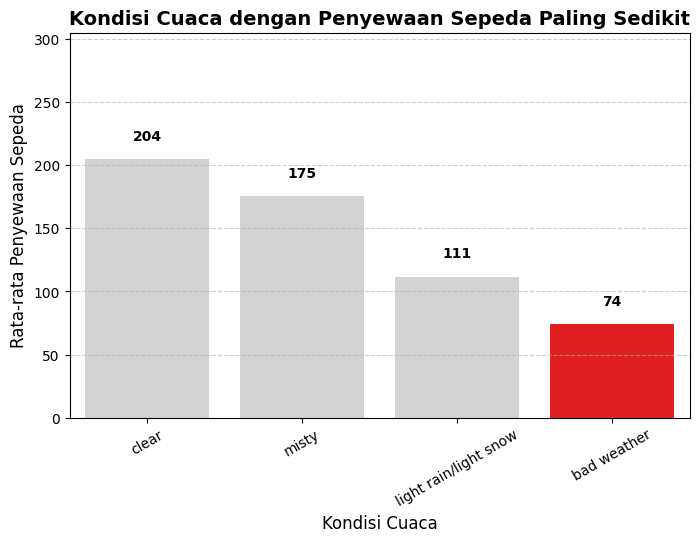

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung rata-rata penyewaan berdasarkan kondisi cuaca
avg_rentals_by_weather = hour_df.groupby('weather_condition', observed=True)['total_rentals'].mean().reset_index()

# Menentukan kondisi cuaca dengan penyewaan paling sedikit
min_weather = avg_rentals_by_weather.loc[avg_rentals_by_weather['total_rentals'].idxmin(), 'weather_condition']

# Menentukan warna untuk tiap kondisi cuaca
colors = {weather: 'lightgray' for weather in avg_rentals_by_weather['weather_condition']}
colors[min_weather] = 'red'  # Warna merah untuk kondisi cuaca dengan penyewaan tersedikit

# Membuat figure
plt.figure(figsize=(8, 5))

# Membuat barplot
ax = sns.barplot(
    data=avg_rentals_by_weather,
    x="weather_condition",
    y="total_rentals",
    hue="weather_condition",
    palette=colors,
    legend=False
)

# Menambahkan nilai penyewaan di atas batang dengan sedikit jarak agar lebih jelas
for index, value in enumerate(avg_rentals_by_weather["total_rentals"]):
    ax.text(index, value + 15, f"{int(value)}", ha="center", fontsize=10, fontweight="bold", color="black")

# Mengatur label dan tampilan grafik
plt.title("Kondisi Cuaca dengan Penyewaan Sepeda Paling Sedikit", fontsize=14, fontweight="bold")
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=30)
plt.ylim(0, avg_rentals_by_weather["total_rentals"].max() + 100)  # Menyesuaikan batas atas agar angka tidak bertabrakan
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

Berdasarkan visualisasi data, penyewaan sepeda **paling sedikit** terjadi pada kondisi cuaca buruk (*bad weather*) **bold text**, dengan **rata-rata hanya 74 penyewaan**. Hal ini cukup wajar karena cuaca buruk, seperti hujan deras, badai, atau salju lebat, membuat orang jarang untuk bersepeda karena alasan keamanan dan kenyamanan. Selain itu, kondisi jalan yang licin atau visibilitas yang rendah juga bisa menjadi faktor utama yang mengurangi minat masyarakat dalam menggunakan sepeda pada kondisi cuaca ekstrem.  

**Sebagai strategi untuk menghadapi penurunan penyewaan di cuaca buruk**, penyedia layanan penyewaan sepeda dapat menawarkan insentif seperti diskon atau program loyalitas bagi pengguna yang tetap menyewa sepeda di hari-hari hujan ringan. Alternatif lain adalah menyediakan opsi sepeda dengan perlindungan tambahan, seperti penutup atau aksesori anti air, serta meningkatkan layanan pelanggan dengan menyediakan tempat parkir atau halte sepeda di beberapa titik agar terlindungi dari hujan.

## **Pertanyaan 5: Mana yang lebih banyak antara penyewa registered atau casual?**


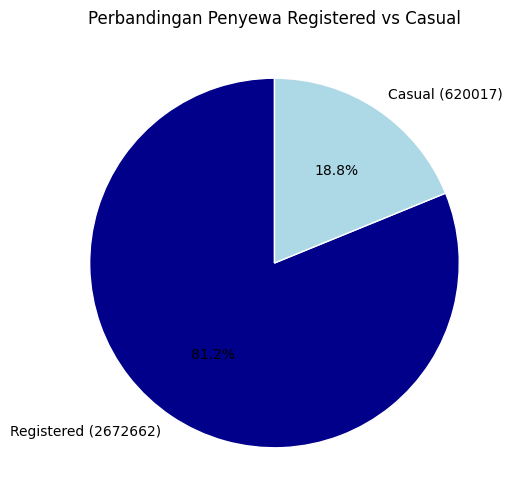

In [39]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'

total_registered = hour_df['registered_rentals'].sum()
total_casual = hour_df['casual_rentals'].sum()

labels = [f'Registered ({total_registered})', f'Casual ({total_casual})']
sizes = [total_registered, total_casual]
colors = ['darkblue', 'lightblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Perbandingan Penyewa Registered vs Casual')

plt.show()

Berdasarkan visualisasi data, jumlah penyewa **registered** jauh lebih banyak dibandingkan dengan penyewa **casual**. Penyewa registered mencakup **81,2%** dari total penyewaan, dengan jumlah sekitar 2.672.662 penyewaan, sedangkan penyewa casual hanya **18,8%** dengan **620.017** penyewaan.

Perbedaan signifikan ini menunjukkan bahwa sebagian besar pengguna lebih memilih untuk mendaftar sebagai penyewa tetap, kemungkinan karena manfaat seperti tarif yang lebih murah, kemudahan akses, atau layanan tambahan yang diberikan kepada pengguna terdaftar.

**Sebagai strategi peningkatan jumlah penyewa casual**, penyedia layanan dapat menawarkan promo khusus atau uji coba keanggotaan gratis agar lebih banyak pengguna tertarik untuk beralih menjadi penyewa registered.

## **Pertanyaan 6 : Kapan orang lebih sering menyewa sepeda, apakah pada hari libur atau hari kerja?**

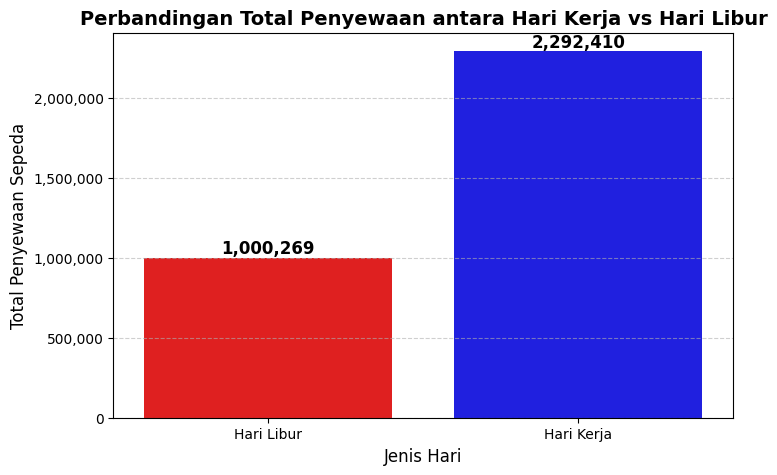

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker

# Data (pastikan 'day_df' sudah tersedia sebelumnya)
rentals_by_day_type = day_df.groupby("working_day", observed=True)["total_rentals"].sum().reset_index()
rentals_by_day_type["working_day"] = rentals_by_day_type["working_day"].map({0: "Hari Libur", 1: "Hari Kerja"})

color_mapping = {"Hari Libur": "red", "Hari Kerja": "blue"}

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=rentals_by_day_type,
    x="working_day",
    y="total_rentals",
    hue="working_day",
    palette=color_mapping,
    legend=False
)

# Menampilkan angka di atas batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.title("Perbandingan Total Penyewaan antara Hari Kerja vs Hari Libur", fontsize=14, fontweight="bold")
plt.xlabel("Jenis Hari", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

Berdasarkan visualisasi data, **orang lebih sering menyewa sepeda pada hari kerja dibandingkan dengan hari libur**. Total penyewaan sepeda pada hari kerja mencapai** 2.292.410** penyewaan, sedangkan pada hari libur hanya **1.000.269** penyewaan.

Perbedaan ini menunjukkan bahwa penggunaan sepeda lebih dominan sebagai alat transportasi harian, kemungkinan besar untuk keperluan bekerja atau sekolah. Sementara itu, pada hari libur, penyewaan sepeda berkurang karena orang mungkin lebih memilih beristirahat atau menggunakan moda transportasi lain untuk rekreasi.

**Sebagai strategi meningkatkan penyewaan di hari libur**, penyedia layanan dapat menawarkan promo spesial akhir pekan, paket sewa keluarga, atau mengadakan event bersepeda yang menarik untuk mendorong lebih banyak orang menggunakan sepeda di waktu senggang.

## **Pertanyaan 7: Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?**


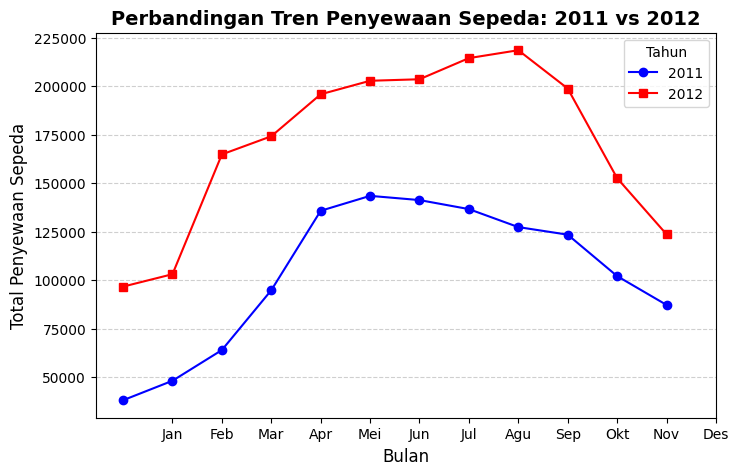

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung total penyewaan sepeda per bulan untuk setiap tahun
monthly_trend = day_df.groupby(["year", "month"], observed=True)["total_rentals"].sum().reset_index()

# Membuat figure
plt.figure(figsize=(8, 5))

# Plot data untuk 2011
plt.plot(
    monthly_trend[monthly_trend["year"] == 2011]["month"],
    monthly_trend[monthly_trend["year"] == 2011]["total_rentals"],
    marker="o", linestyle="-", color="blue", label="2011"
)

# Plot data untuk 2012
plt.plot(
    monthly_trend[monthly_trend["year"] == 2012]["month"],
    monthly_trend[monthly_trend["year"] == 2012]["total_rentals"],
    marker="s", linestyle="-", color="red", label="2012"
)

# Menambahkan judul & label
plt.title("Perbandingan Tren Penyewaan Sepeda: 2011 vs 2012", fontsize=14, fontweight="bold")
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.legend(title="Tahun")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Menampilkan plot
plt.show()

Berdasarkan hasil visualisasi menunjukkan bahwa total penyewaan sepeda meningkat signifikan dari 1.243.103 pada tahun 2011 menjadi 2.049.576 pada tahun 2012, dengan kenaikan lebih dari 800.000 penyewaan. Tren bulanan di kedua tahun mengikuti pola serupa, dengan peningkatan mulai Maret, mencapai puncak di musim panas (Mei–September), dan menurun menjelang akhir tahun. Namun, jumlah penyewaan di 2012 jauh lebih tinggi dibandingkan 2011, menunjukkan pertumbuhan pengguna atau faktor lain seperti promosi atau kondisi cuaca yang lebih mendukung.

**Agar tren penyewaan sepeda terus meningkat di tahun-tahun berikutnya, beberapa strategi yang bisa diterapkan antara lain :**

1. Meningkatkan Aksesibilitas dan Infrastruktur dengan menambah jumlah stasiun penyewaan di area strategis seperti pusat kota, kampus, dan kawasan wisata.
2. Memperluas jalur sepeda serta meningkatkan keamanan dan kenyamanan bagi pesepeda.
3. Menawarkan sepeda dengan fitur tambahan seperti sepeda listrik atau sepeda dengan pelindung hujan.
4. Menawarkan langganan penyewaan yang fleksibel, misalnya dengan paket langganan harian, mingguan, atau bulanan agar lebih terjangkau dan dapat meningkatkan jumlah pelanggan registered.
5. Memberikan diskon atau cashback untuk pengguna baru atau pelanggan loyal.
6. Berkolaborasi dengan tempat wisata.
7. Memberlakukan program referral, di mana pengguna mendapatkan bonus saat mengajak teman menggunakan layanan penyewaan sepeda.
8. Melakukan promosi khusus di musim dingin atau hujan, seperti tarif lebih murah atau penyewaan gratis setelah jumlah tertentu.
9. Menyediakan perlengkapan atau alat protect musim dingin seperti sarung tangan, mantel atau roda yang lebih tahan terhadap kondisi basah.
10. Membuat aplikasi mobile yang lebih intuitif untuk pemesanan cepat, tracking sepeda, dan metode pembayaran digital.


## **Analisis Lanjutan**

Analisis lanjutan menggunakan manual grouping dan binning dipilih karena metode ini lebih sederhana, cepat, dan mudah diinterpretasikan untuk memahami pola penyewaan sepeda berdasarkan faktor eksternal seperti musim, hari kerja/libur, dan kondisi cuaca. Metode lain seperti clustering atau analisis RFM tidak digunakan karena dataset ini lebih fokus pada tren penyewaan harian daripada perilaku pelanggan individu atau segmentasi berbasis algoritma. Dengan pendekatan ini, insight yang dihasilkan bisa langsung digunakan untuk pengambilan keputusan operasional.

**1. Manual Grouping: Mengelompokkan rata-rata penyewaan sepeda berdasarkan musim, hari kerja/libur, dan kondisi cuaca.**

In [42]:
import pandas as pd

grouped_season = day_df.groupby('season', observed=True)['total_rentals'].mean()
grouped_working_day = day_df.groupby('working_day', observed=True)['total_rentals'].mean()
grouped_weather = day_df.groupby('weather_condition', observed=True)['total_rentals'].mean()

print("Rata-rata penyewaan berdasarkan Musim:\n", grouped_season)
print("\nRata-rata penyewaan berdasarkan Hari Kerja/Libur:\n", grouped_working_day)
print("\nRata-rata penyewaan berdasarkan Kondisi Cuaca:\n", grouped_weather)

Rata-rata penyewaan berdasarkan Musim:
 season
Spring    2604.132597
Summer    4992.331522
Fall      5644.303191
Winter    4728.162921
Name: total_rentals, dtype: float64

Rata-rata penyewaan berdasarkan Hari Kerja/Libur:
 working_day
0    4330.168831
1    4584.820000
Name: total_rentals, dtype: float64

Rata-rata penyewaan berdasarkan Kondisi Cuaca:
 weather_condition
clear                    4876.786177
misty                    4035.862348
light rain/light snow    1803.285714
Name: total_rentals, dtype: float64


2. **Binning : Mengelompokkan jumlah penyewaan sepeda ke dalam kategori berdasarkan kuartil.**

In [43]:
quantiles = day_df['total_rentals'].quantile([0.33, 0.66]).values

def categorize_rentals(value):
    if value <= quantiles[0]:
        return "Rendah"
    elif value <= quantiles[1]:
        return "Sedang"
    else:
        return "Tinggi"

day_df['rental_category'] = day_df['total_rentals'].apply(categorize_rentals)

print(day_df['rental_category'].value_counts())

rental_category
Tinggi    249
Rendah    241
Sedang    241
Name: count, dtype: int64


## **Conclusion**

Berdasarkan hasil analisis data penyewaan sepeda, terdapat beberapa temuan utama yang dapat menjadi dasar pengambilan keputusan strategis untuk meningkatkan jumlah penyewaan dan memperluas pasar antara lain sebagai berikut:

1. **Waktu dan Pola Penyewaan**

    Puncak penyewaan terjadi pada pukul 17:00 dan 18:00, yang mencerminkan penggunaan utama sepeda sebagai alat transportasi saat jam pulang dari produktivitas dan Penyewaan cenderung rendah pada tengah malam hingga pagi dini hari (00:00 - 05:00), sehingga periode ini dapat dimanfaatkan untuk maintenance sepeda. Untuk meningkatkan penyewaan di luar jam sibuk, strategi seperti diskon khusus pada jam non-peak dapat diterapkan.

2. **Tren Musiman dan Bulanan**

    Penyewaan sepeda mencapai puncaknya pada bulan Juni, Juli, dan Agustus, yang kemungkinan besar dipengaruhi oleh musim panas dan liburan. Sebaliknya, bulan Januari memiliki jumlah penyewaan terendah karena kondisi cuaca yang kurang mendukung. Untuk menghadapi lonjakan di bulan yang sibuk, penting untuk menambah unit sepeda dan memastikan layanan dalam kondisi optimal.

3. **Pola Penyewaan Harian**

    Hari Jumat menjadi hari dengan penyewaan tertinggi, sementara Minggu memiliki jumlah penyewaan terendah. Hal ini menunjukkan bahwa mayoritas pengguna menggunakan sepeda untuk keperluan dalam menunjang aktifitas produktifnya. Dan strategi seperti promosi akhir pekan atau paket wisata dapat diterapkan untuk meningkatkan penyewaan di hari Minggu.

4. **Pengaruh Cuaca terhadap Penyewaan**

    Penyewaan sepeda menurun drastis dalam kondisi cuaca buruk dengan rata-rata hanya 74 penyewaan per hari. Untuk mengatasi hal ini, perusahaan dapat menyediakan perlengkapan tambahan seperti mantel hujan atau diskon khusus saat hujan ringan.

5. **Perbandingan Penyewa Registered vs Casual**

    Sebagian besar penyewa adalah pengguna terdaftar (81,2%), sementara penyewa casual hanya 18,8%. dan untuk meningkatkan jumlah penyewa casual dapat dilakukan melalui promo uji coba keanggotaan dan diskon eksklusif bagi pelanggan baru.

6. **Hari Kerja vs. Hari Libur**

    Penyewaan sepeda jauh lebih tinggi pada hari kerja (2.292.410 penyewaan) dibandingkan hari libur (1.000.269 penyewaan). Untuk meningkatkan penyewaan di hari libur, strategi seperti paket penyewaan keluarga dan event bersepeda dapat diterapkan.

7. **Tren Tahunan dan Potensi Pertumbuhan**

    Hasil uji menunjukkan terjadi pertumbuhan signifikan dalam penyewaan sepeda dari 2011 ke 2012, dengan peningkatan lebih dari 800.000 penyewaan dan untuk mempertahankan tren positif ini, beberapa strategi dapat dilakukan, seperti memperluas jalur sepeda, menambah jumlah stasiun, menawarkan langganan fleksibel, serta meningkatkan promosi dan kerja sama dengan tempat wisata.


Kesimpulan berdasarkan hasil uji menunjukkan bahwa sepeda digunakan lebih banyak sebagai alat transportasi harian dibandingkan sebagai sarana rekreasi. Oleh karena itu, strategi pengembangan bisnis harus fokus pada peningkatan kenyamanan, aksesibilitas, serta penawaran layanan yang lebih fleksibel bagi berbagai segmen pelanggan. Dengan menerapkan strategi yang tepat, bisnis penyewaan sepeda dapat terus berkembang dan menjangkau lebih banyak pengguna di masa mendatang.